s=2505, k = 17
[2124, 3179]
True
n = 5000 k =  2log(n) r =  2*sqrt(log(n)/n)
Amount of clique nodes not found in 1 iterations is 0
Efficiency is 1.0
Time Elapsed:  79.42308783531189  seconds
clique_nodes_not_found 0
-----------------------------------------------------------


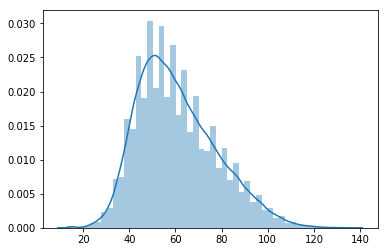

In [35]:

import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import math
import time
import seaborn as sns

n_list=[5000]
for n in n_list:
    k_dict={'n/2':n/2,'n/log(n)':n/math.log(n),'sqrt(n)':math.sqrt(n),'2log(n)':2*math.log(n),'log(n)':math.log(n)}
    r_dict={'1/sqrt(n)':1/math.sqrt(n),'2*sqrt(log(n)/n)':2*math.sqrt(math.log(n)/n),'1/n^1/4':1/(n**(1/4))}
    non_cliques_list=[]
#     for k_key in ['n/2','n/log(n)','sqrt(n)','2log(n)']:
    for k_key in ['2log(n)']:
        k=int(k_dict[k_key])
#         for r_key in ['1/sqrt(n)','2*sqrt(log(n)/n)','1/n^1/4']:
        for r_key in ['2*sqrt(log(n)/n)']:
            r=r_dict[r_key]
            s=int(n/k*math.log(n))  #size of subset
#             s = 2000
            print("s=%d, k = %d"%(s,k))
            total_time=0
            clique_nodes_not_found=0
            copy_list=[]
            copy_list2=[]
            non_cliques_list=[]
            iter=0
            while iter<1:
                iter+=1
                G = nx.random_geometric_graph(n, r)
                start=time.time()
                # position is stored as node attribute data for random_geometric_graph
                #pos = nx.get_node_attributes(G, 'pos')

                # find node near center (0.5,0.5)
                #         dmin = 1
                #         ncenter = 0
                #         for i in pos:
                #             x, y = pos[i]
                #             d = (x - 0.5)**2 + (y - 0.5)**2
                #             if d < dmin:
                #                 ncenter = i
                #                 dmin = d

                # color by path length from node near center

                # p = dict(nx.single_source_shortest_path_length(G, ncenter))

                # plt.figure(figsize=(8, 8))
                # nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
                # nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                #                        node_size=80,
                #                        node_color=list(p.values()),
                #                        cmap=plt.cm.Reds_r)

                # plt.xlim(-0.05, 1.05)
                # plt.ylim(-0.05, 1.05)
                # plt.axis('off')
                # plt.show()


#                 C=list(nx.find_cliques(G))
#                 max=0
#                 for i in range(1,len(C)):
#                     if len(C[i])>max:
#                         max=len(C[i])
                #         k=int(math.sqrt(n*math.log(n))/2)

                sampling_list=list(G.nodes)
                clique_vertices=[]
                for i in range(k):
                    choice=random.choice(sampling_list)
                    sampling_list.remove(choice)
                    clique_vertices.append(choice)

                for i in clique_vertices:
                    for j in clique_vertices:
                        if i!=j:
                            G.add_edge(i,j)
                            
                
                sampling_list=list(G.nodes)    
                S=[] 
                for i in range(s):
                    choice=random.choice(sampling_list)
                    sampling_list.remove(choice)
                    S.append(choice)
                    
#                 print(clique_vertices)
#                 print(S)
                nodes = list(G.nodes)
                common_neighb_list = []
                for i in nodes:
                    for j in nodes:
                        if (i,j) in G.edges:
                            common_neighbours=list(nx.common_neighbors(G, i, j))
                            common_neighb_list.append(len(common_neighbours))
                sns.distplot(common_neighb_list)
                S_valid=0
                for i in S:
                    for j in S:
                        if (i,j) in G.edges:
                            common_neighbours=list(nx.common_neighbors(G, i, j))
                            if len(common_neighbours)==k-2:
                                
                                final_clique_found=common_neighbours+[i,j]
                                pair_found=[i,j]
                                print(pair_found)
                                S_valid=1
                                print(i in clique_vertices and j in clique_vertices)
                                break
                    if S_valid==1:
                        break

                non_cliques=0
                if S_valid==1:
                    if len(final_clique_found)>=k:
                        clique_nodes_not_found+=len(set(clique_vertices)-set(random.sample(final_clique_found,k)))
                    else:
                        clique_nodes_not_found+=len(set(clique_vertices)-set(final_clique_found))
                else:
                    final_clique_found=[]
                    clique_nodes_not_found+=k
                #print(non_cliques)
#                 print(clique_nodes_not_found)
                end=time.time()
                total_time+=end-start
            print('n =',n,'k = ', k_key , 'r = ', r_key)
            print('Amount of clique nodes not found in', iter, 'iterations','is',clique_nodes_not_found)
            print('Efficiency is',1-clique_nodes_not_found/k/iter)
            print('Time Elapsed: ',total_time,' seconds')
            copy_list.append(round(1-clique_nodes_not_found/k/iter, 3))
            copy_list2.append(round(end-start,2))
            print('clique_nodes_not_found',clique_nodes_not_found)
            print('-----------------------------------------------------------')
#         print('copy from these lists', copy_list,copy_list_2)


0.0825454696099852
0.11892071150027211


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5000


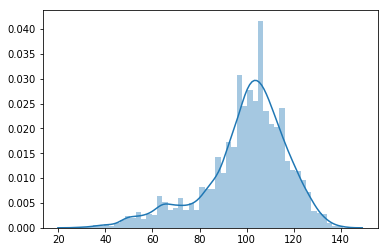

In [134]:
print(2*math.sqrt(math.log(n)/n))
print(1/n**(1/4))
G = nx.random_geometric_graph(n, r)
degrees=[x[1] for x in G.degree()]
# print(degrees)
sns.distplot(degrees);
print(n)

In [56]:
wrong=0
right=0
pairs_in_S=0
for i in range(len(clique_vertices)):
    for j in range(len(clique_vertices)):
        if j>i:
            if len(list(nx.common_neighbors(G,clique_vertices[i],clique_vertices[j])))>k-2:
                wrong+=1
            elif len(list(nx.common_neighbors(G,clique_vertices[i],clique_vertices[j])))==k-2:
                if clique_vertices[i] in S and clique_vertices[j] in S:
                    pairs_in_S+=1
                    right+=1
print(right/wrong)
print(right)
print(common_neighbours)
print(len(final_clique_found))
print(k)
print(pairs_in_S)
print(pair_found)
print(sorted(clique_vertices))

0.208
26
[348, 654, 273, 358, 736, 336, 559, 995, 650, 956, 260, 862, 923, 165, 317, 133, 524, 222, 19, 909, 225, 750, 497, 277, 278, 707, 894, 652, 867]
31
31
26
[730, 760]
[72, 112, 135, 149, 154, 174, 181, 216, 231, 242, 250, 280, 303, 326, 380, 381, 382, 440, 443, 455, 465, 479, 481, 514, 556, 694, 736, 816, 854, 898, 905]


[70, 90, 61, 82, 93, 81, 65, 45, 78, 77, 78, 33, 89, 48, 43, 75, 52, 87, 88, 58, 74, 55, 79, 75, 86, 77, 76, 55, 68, 52, 85, 59, 84, 84, 88, 69, 84, 55, 60, 43, 68, 56, 43, 77, 79, 52, 42, 81, 78, 38, 83, 64, 84, 83, 46, 75, 84, 94, 80, 77, 78, 72, 90, 42, 79, 84, 84, 84, 58, 74, 74, 60, 71, 43, 90, 76, 83, 83, 87, 86, 93, 87, 83, 82, 87, 58, 55, 84, 36, 75, 75, 86, 84, 40, 98, 49, 87, 86, 38, 87, 65, 79, 52, 52, 51, 86, 89, 93, 86, 71, 87, 82, 72, 67, 80, 62, 81, 56, 84, 83, 84, 87, 78, 86, 77, 81, 77, 85, 57, 92, 73, 76, 46, 83, 89, 83, 69, 47, 74, 61, 62, 84, 55, 63, 73, 91, 91, 89, 75, 86, 48, 77, 79, 73, 60, 76, 56, 79, 67, 79, 88, 88, 49, 75, 54, 64, 48, 57, 67, 84, 86, 41, 84, 85, 71, 77, 85, 86, 85, 46, 89, 55, 81, 81, 71, 52, 60, 51, 91, 70, 74, 95, 72, 89, 20, 83, 73, 57, 36, 87, 53, 90, 59, 74, 57, 66, 84, 74, 81, 80, 90, 91, 74, 71, 85, 82, 94, 35, 72, 77, 24, 69, 81, 74, 78, 85, 77, 78, 88, 69, 43, 78, 92, 83, 62, 87, 87, 87, 90, 78, 79, 81, 54, 78, 97, 87, 36, 90, 92, 90,

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


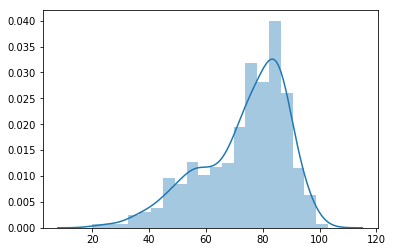

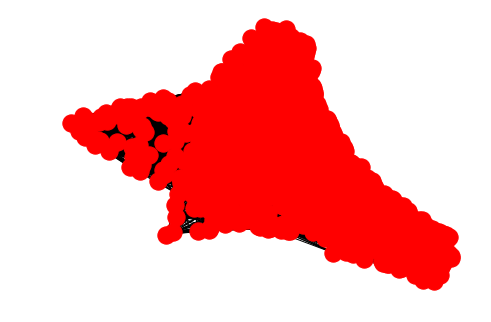

In [105]:
nx.draw(G)